<a href="https://colab.research.google.com/github/tanveerkn/Reputation-Score-Model/blob/master/twiteer_reputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import numpy as np
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [0]:
file=('dataframealluser1.csv')
features = pd.read_csv(file)
corr = features.corr()
print("Correlation of features with the reputation score \n")
print (corr['Reputation_score'])
features=features.iloc[ : ,3:]



Correlation of features with the reputation score 

id_str               -0.204611
statuses_count        0.073880
followers_count       0.636434
listed_count          0.433960
friends_count         0.030450
has_url               0.122642
mention_by_others     0.336129
retweet_ratio        -0.112384
liked_ratio           0.222847
orig_content_ratio    0.107863
hashtag_ratio        -0.086178
urls_ratio            0.003500
symbols_ratio         0.135827
mentions_ratio       -0.099517
Social_reputation     0.662557
retweet_hindex       -0.131747
like_hindex           0.999845
Content_Score        -0.039494
Context_score         0.106145
Reputation_score      1.000000
Name: Reputation_score, dtype: float64


In [0]:
# X=features.iloc[:,:-1]
# X=X.clip(features.quantile(0.20), features.quantile(0.80), axis=1)
# y=features.iloc[:,-1].values
# col = [x for x in list(X) if x not in ['id_str', 'screen_name','Social_reputation', 'like_hindex','retweet_hindex', 'Content_Score', 'Context_score']]
# X=X[col].values

# model = []
# accuracy = []
# error= []
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# sc_X=StandardScaler()
# X_train=sc_X.fit_transform(X_train)
# X_test=sc_X.transform(X_test)

# sc_y=StandardScaler()
# y_train=y_train.reshape (-1,1)
# y_test=y_test.reshape (-1,1)
# y_train=sc_y.fit_transform(y_train)
# # y_train = y_train.reshape (-1,1)
# y_test=sc_y.transform(y_test)
# # y_test = y_test.reshape (-1,1)
# y_test


In [0]:
def make_train_test_set(df, train_test_split_prct, clipping_quantile):
    msk = np.random.rand(len(df)) < train_test_split_prct
    train_df = df[msk].copy()

    test_df = df[~msk].copy()


    thres = train_df.quantile(clipping_quantile)
    # test_qu=train_df.quantile(clipping_quantile)


    fet_list = [x for x in list(df) if x not in ['id_str', 'screen_name',"symbols_ratio"]]

    for col in fet_list:

        if col:
            train_df[col] = train_df[col] / thres[col]

            test_df[col] = test_df[col] / thres[col]

    train_df.iloc[:,2:-1].clip(0,1)

    test_df.iloc[:,2:-1].clip(0,1)

    # , 'statuses_count', 'followers_count', 'listed_count', 'friends_count', 'has_url', 'mention_by_others', 'retweet_ratio', 'liked_ratio', 'orig_content_ratio', 'hashtag_ratio', 'urls_ratio', 'symbols_ratio', 'mentions_ratio', 'Social_reputation', 'retweet_hindex', 'like_hindex', 'Content_Score', 'Context_score']]

    cols = [col for col in list(df) if col not in ['id_str', 'screen_name','Social_reputation', 'retweet_hindex', 'Content_Score', 'Context_score']]

    y_train = train_df['Reputation_score'].values
    # print(y_train)

    y_test = test_df['Reputation_score'].values
    # print(y_test)
    X_train = train_df[cols].values

    X_test = test_df[cols].values

    return X_train, X_test, y_train, y_test, thres.transpose(), fet_list



X_train, X_test, y_train, y_test, thres, fet_list = make_train_test_set(features, 0.8 , 0.9)

In [0]:
  print("Comparision of Models ....\n")

  print("\n Model Name \t\t\t MSE_REG \n")
  for key in regr_dict.keys():
      print("{0:20}\t\t {1:.5f}\t\t{2:.5f}\n".format(key, MSE_reg[key],Var_reg[key]))


# Multi Layer Perceptron

Poly
SVR(C=100, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
hello2
hello3


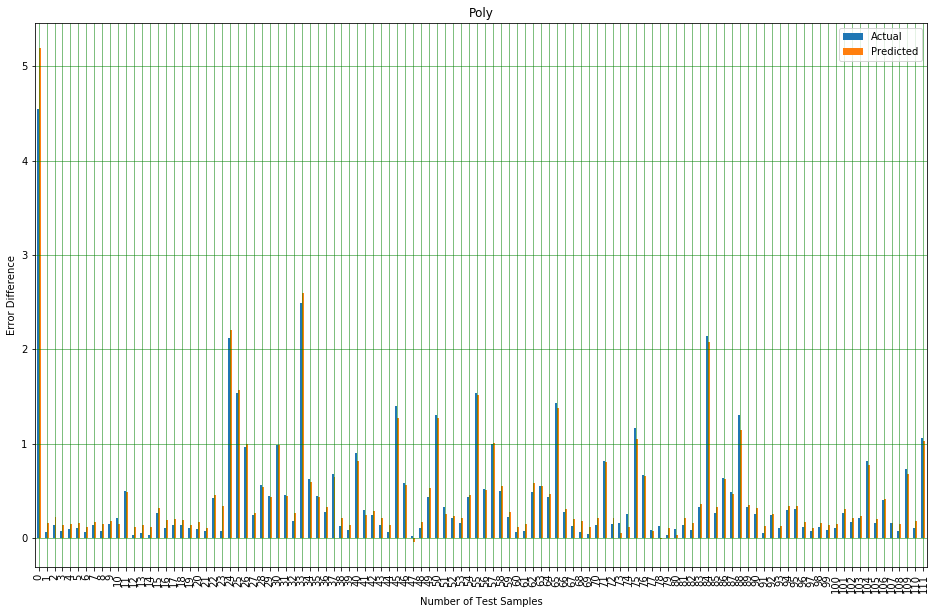

Mean Absolute Error: 0.06046278222992425
Mean Squared Error: 0.008132241661342647
Root Mean Squared Error: 0.09017894244967972
Comparision of Models ....

Linear
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
hello2
hello3


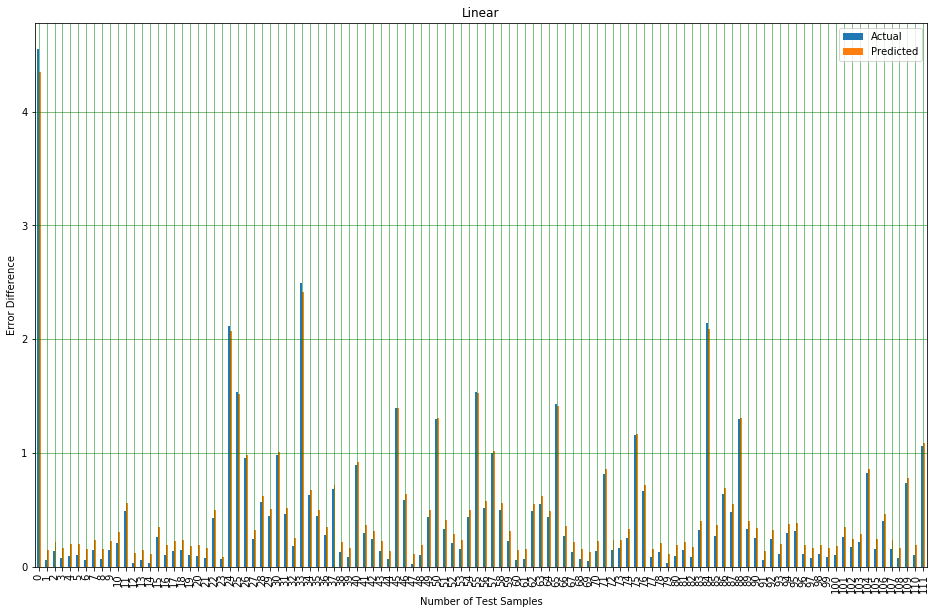

Mean Absolute Error: 0.07039604026097754
Mean Squared Error: 0.005681885156177823
Root Mean Squared Error: 0.07537828040077475
Comparision of Models ....

RBF
SVR(C=100, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
hello2
hello3


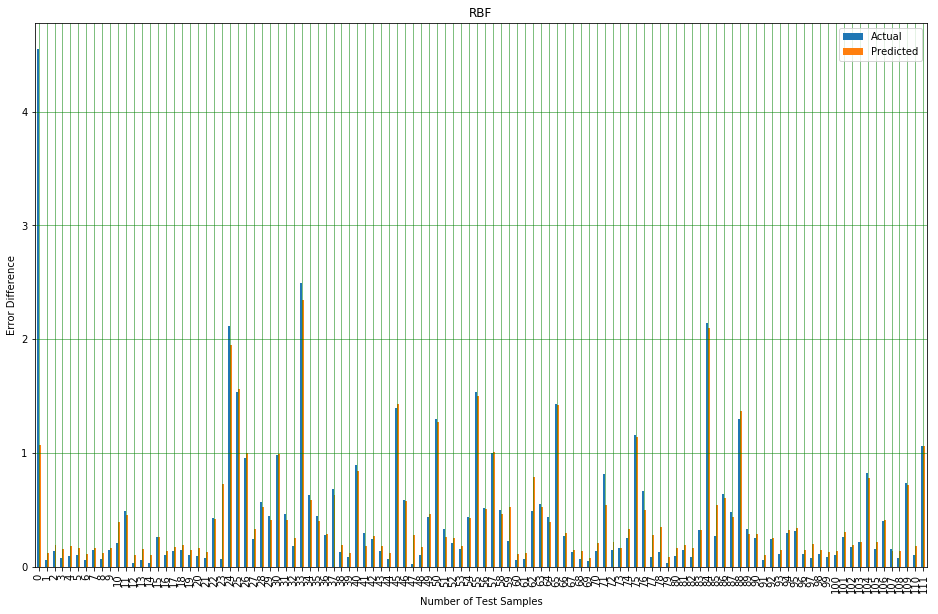

Mean Absolute Error: 0.09657573828819886
Mean Squared Error: 0.11970056277007934
Root Mean Squared Error: 0.34597769114507854
Comparision of Models ....


 Model Name 			 MSE_MLP 

Poly                		 0.00813		0.97836

Linear              		 0.00568		0.98488

RBF                 		 0.11970		0.68146



In [0]:
from matplotlib import pyplot
svr = MLPRegressor(
    hidden_layer_sizes=(50,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=100, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


svr_dict  = {"Poly": SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1),
              "Linear": SVR(kernel='linear', C=100, gamma='auto'),
              "RBF": SVR(kernel='rbf', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
              }

# mse_svr_list = []
# lets run the experiment multiple times
MSE_svr = {}
Var_svr = {}
MAE_svr={}
RMSE={}

# #
for key in svr_dict.keys():
  print(key)
  svr = svr_dict[key]
  print(svr)
  # Train the model using the training sets
  history=svr.fit(X_train, y_train)
#   print(svr.summary())
  y_pred_svr = svr.predict(X_test)
  model.append(key)

  MSE_svr[key] = metrics.mean_squared_error(y_test, y_pred_svr)
  MAE_svr[key]=metrics.mean_absolute_error(y_test, y_pred_svr)
  RMSE[key]=np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr))
  print("hello2")
  Var_svr[key] = svr.score(X_test, y_test)
  accuracy.append(Var_svr[key])
  error.append(MSE_svr[key])
  print("hello3")
  df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_svr.flatten()})
  df1 = df
  df1.plot(kind='bar', figsize=(16, 10))
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.ylabel('Error Difference')
  plt.xlabel('Number of Test Samples')
  plt.title('{}'.format(key))
  # plt.scatter(X_test, y_test, color='gray')
  # plt.plot(X_test, y_pred_svr, color='red', linewidth=2)
  plt.savefig(key+'.png', dpi=300, bbox_inches='tight')
  plt.show()
  
#   pyplot.title('Loss / Mean Squared Error')
#   pyplot.plot(history.history['loss'], label='train')
#   pyplot.plot(history.history['val_loss'], label='test')
#   pyplot.legend()
#   pyplot.show()
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_svr))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_svr))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))
  print("Comparision of Models ....\n")

print("\n Model Name \t\t\t MSE_MLP \n")
for key in svr_dict.keys():
  print("{0:20}\t\t {1:.5f}\t\t{2:.5f}\n".format(key, MSE_svr[key],Var_svr[key]))

social media and machine learning conferences 2020

In [0]:
ls

dataframealluser1.csv      Weights-005--0.04119.hdf5  Weights-034--0.01473.hdf5
Linear.png                 Weights-009--0.03882.hdf5  Weights-069--0.01456.hdf5
Poly.png                   Weights-010--0.02936.hdf5  Weights-072--0.01444.hdf5
RBF.png                    Weights-014--0.02933.hdf5  Weights-079--0.01152.hdf5
sample_data/               Weights-016--0.02436.hdf5  Weights-114--0.01140.hdf5
Weights-001--0.22423.hdf5  Weights-019--0.02337.hdf5  Weights-170--0.01139.hdf5
Weights-002--0.17912.hdf5  Weights-030--0.01963.hdf5  Weights-217--0.00865.hdf5
Weights-003--0.07496.hdf5  Weights-031--0.01781.hdf5  Weights-577--0.00844.hdf5
Weights-004--0.06436.hdf5  Weights-032--0.01492.hdf5


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               2048      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 166,913
Trainable params: 166,913
Non-trainable params: 0
_________________________________________________________________
Train on 388 samples, validate on 112 samples
Epoch 1/1000
388/388 [==============================] - 0s 1ms/step 

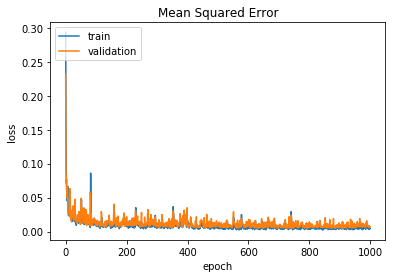

In [0]:
# ######################Deep Neural network for regressor################
# # Define a sequential model
# # Add some dense layers
# # Use ‘relu’ as the activation function for the hidden layers
# # Use a ‘normal’ initializer as the kernal_intializer
# # We will use mean_absolute_error as a loss function
# # Define the output layer with only one node
# # Use ‘linear ’as the activation function for the output layer
#
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()


########Define a check point####################
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

history=NN_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test,y_test), callbacks=callbacks_list)
print(len(NN_model.predict(X_test)))
# print(NN_model.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Mean Squared Error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('MSEDNN.png', dpi=300, bbox_inches='tight')
plt.show()
# plt.savefig('mse.png')


# ##########MLP regressor#########################




############################################################################################

In [0]:
ls

dataframealluser1.csv      Weights-011--0.02130.hdf5  Weights-089--0.00800.hdf5
Linear.png                 Weights-013--0.02403.hdf5  Weights-113--0.00701.hdf5
MSEDNN.png                 Weights-014--0.02177.hdf5  Weights-113--0.00742.hdf5
Poly.png                   Weights-014--0.02933.hdf5  Weights-114--0.01140.hdf5
RBF.png                    Weights-016--0.02436.hdf5  Weights-170--0.01139.hdf5
sample_data/               Weights-017--0.01825.hdf5  Weights-176--0.00691.hdf5
Weights-001--0.22423.hdf5  Weights-018--0.01816.hdf5  Weights-201--0.00710.hdf5
Weights-001--0.22889.hdf5  Weights-018--0.01888.hdf5  Weights-216--0.00696.hdf5
Weights-001--0.23188.hdf5  Weights-019--0.01415.hdf5  Weights-217--0.00865.hdf5
Weights-002--0.09334.hdf5  Weights-019--0.02337.hdf5  Weights-225--0.00690.hdf5
Weights-002--0.13720.hdf5  Weights-020--0.01492.hdf5  Weights-226--0.00657.hdf5
Weights-002--0.17912.hdf5  Weights-029--0.01158.hdf5  Weights-299--0.00690.hdf5
Weights-003--0.06088.hdf5  Weights-030--

In [0]:
#####################Plotting graph for socre of different models###############################


index = np.arange(len(model))
plt.bar(index,accuracy,alpha=1,color='blue')
plt.ylabel('Accuracy')
plt.xlabel('Different Machine Learning Models')
plt.xticks(index,model)
plt.title("Models Comparison")
plt.show()
#######feautre correlation visualizing using seaborn###############